Training Data Loaded
Testing Data Loaded

Training Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  insta

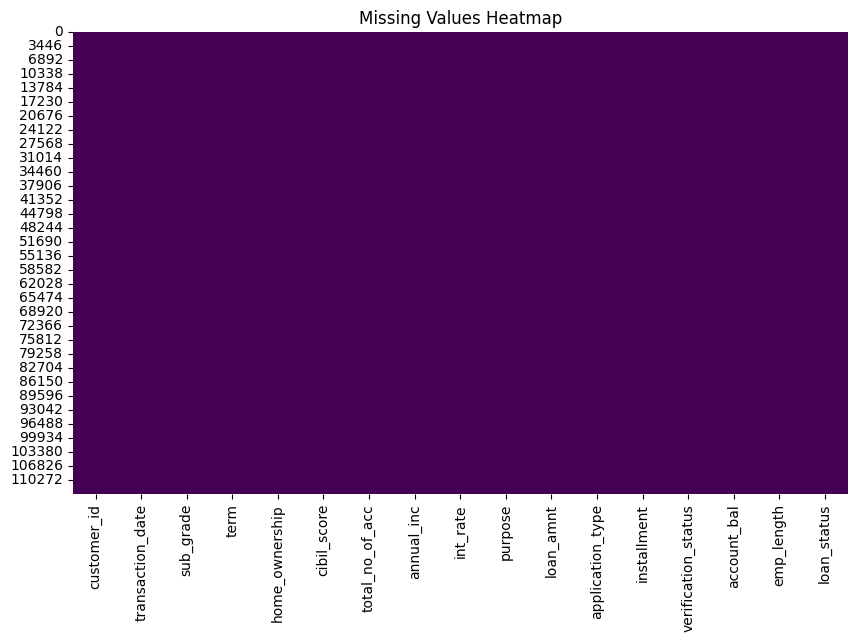

<ipython-input-1-90391d7f1b37>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_data, palette='coolwarm')


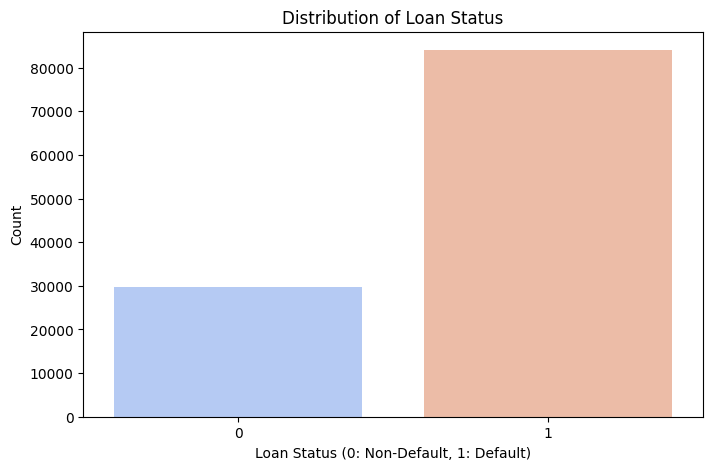

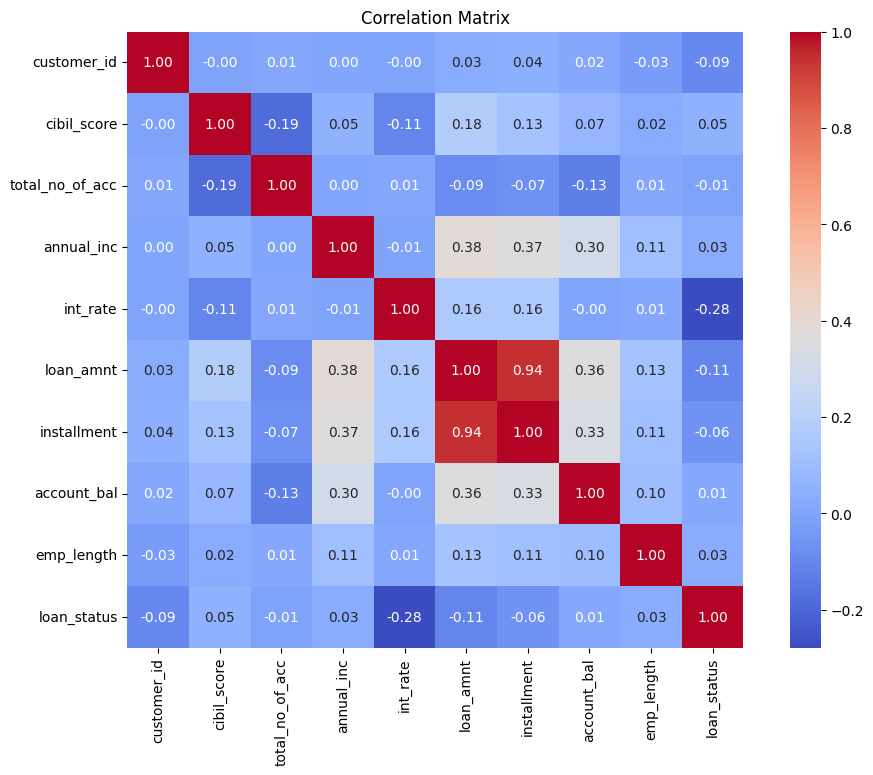

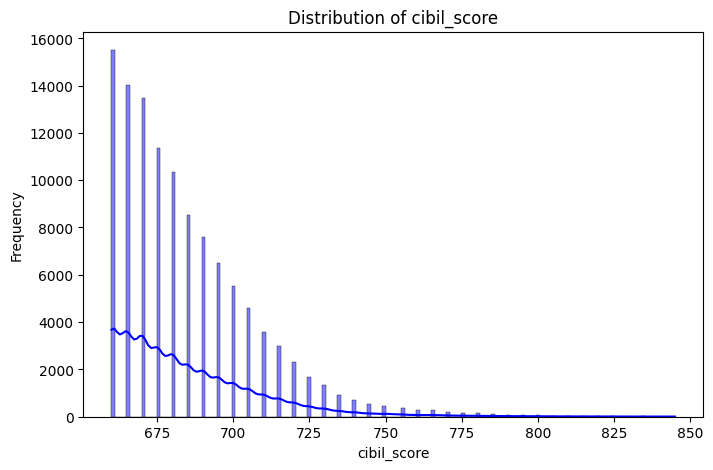

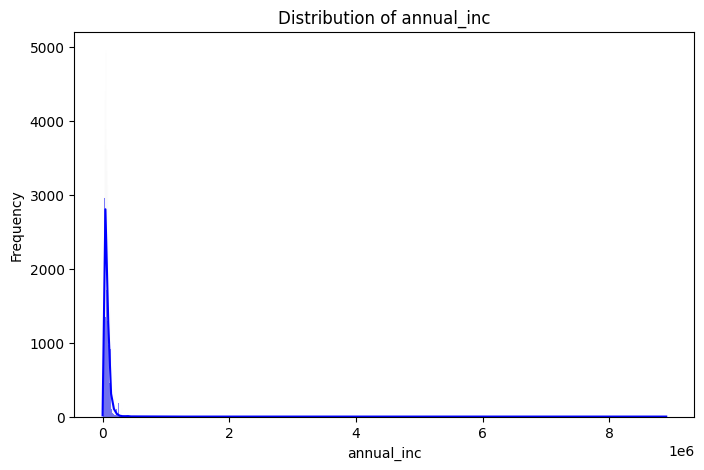

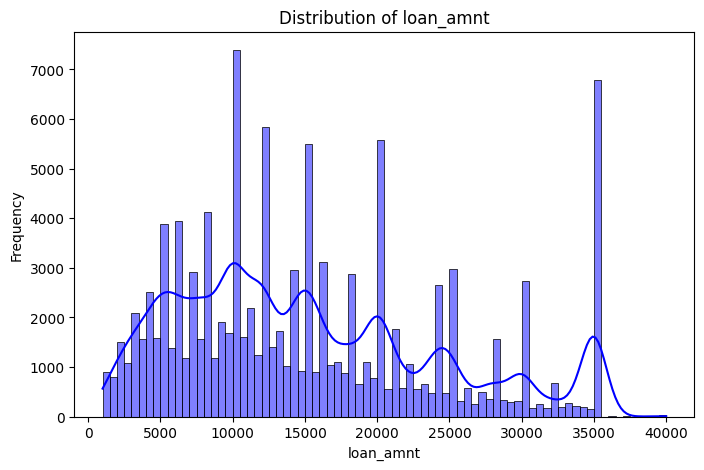

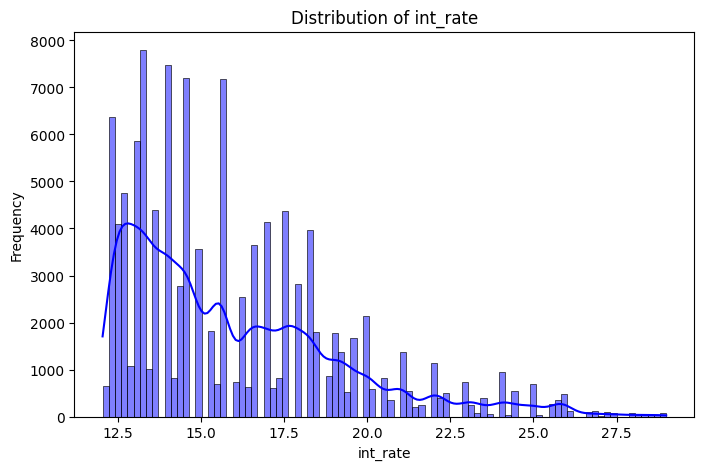

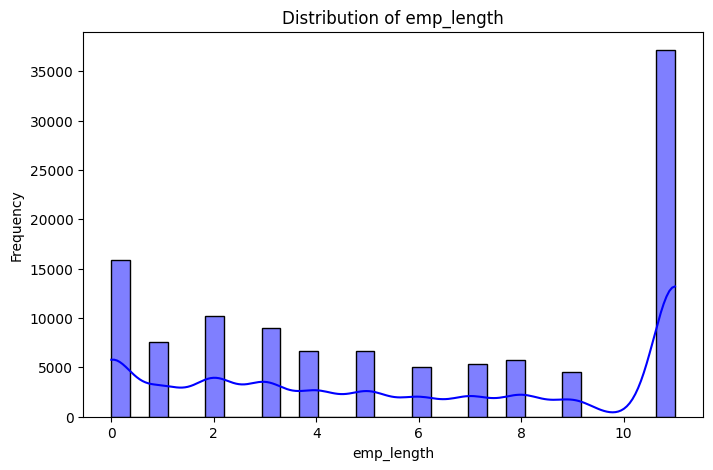

<ipython-input-1-90391d7f1b37>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


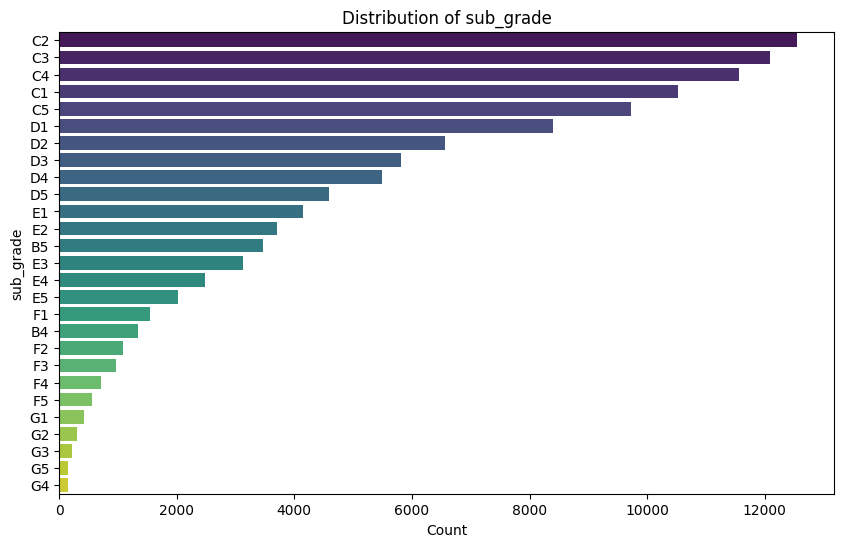

<ipython-input-1-90391d7f1b37>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


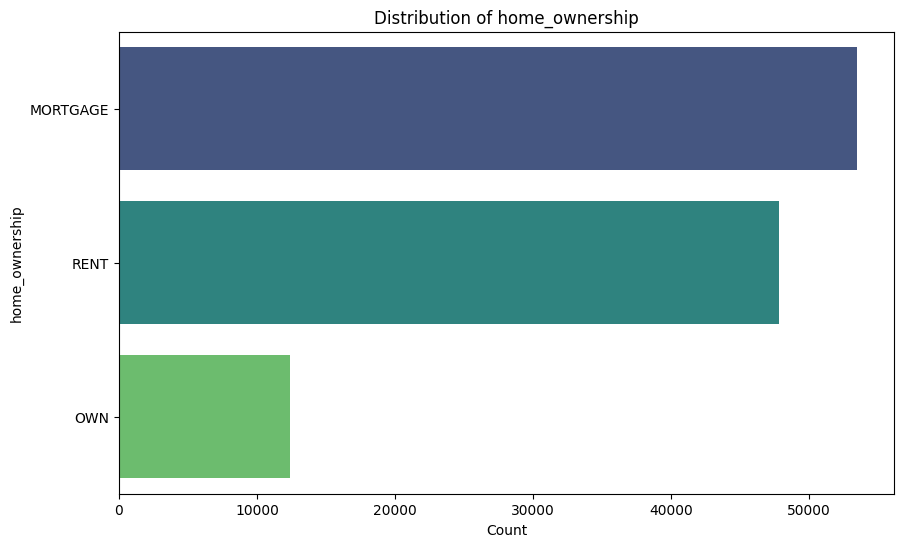

<ipython-input-1-90391d7f1b37>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


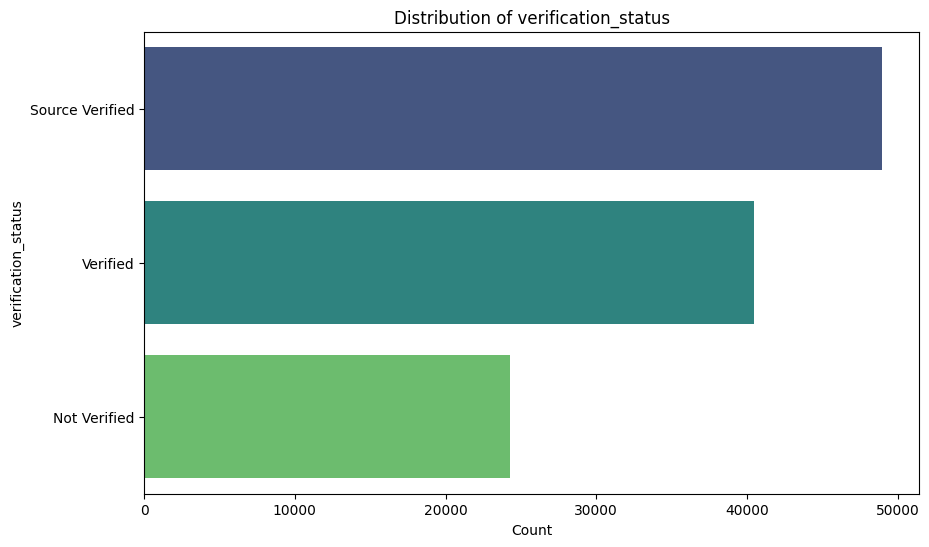

<ipython-input-1-90391d7f1b37>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


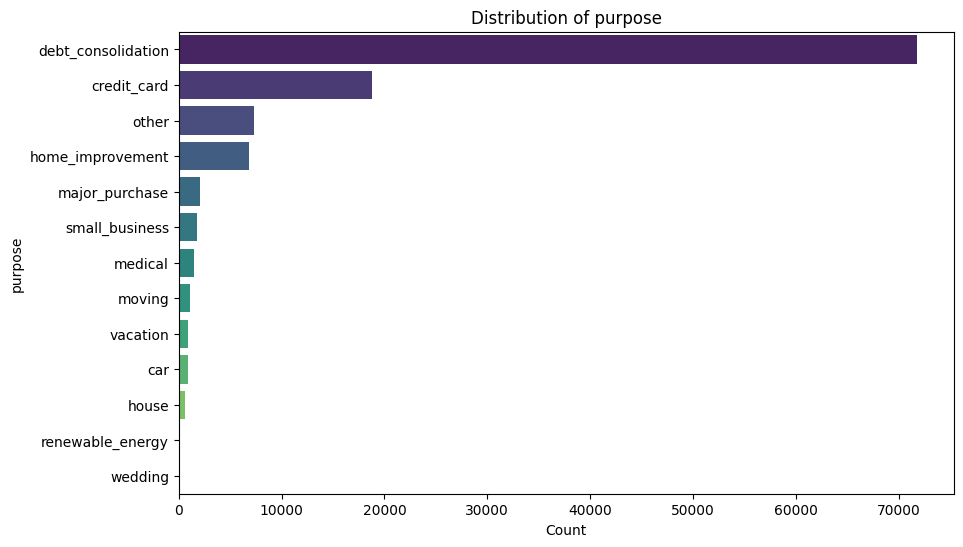

<ipython-input-1-90391d7f1b37>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)


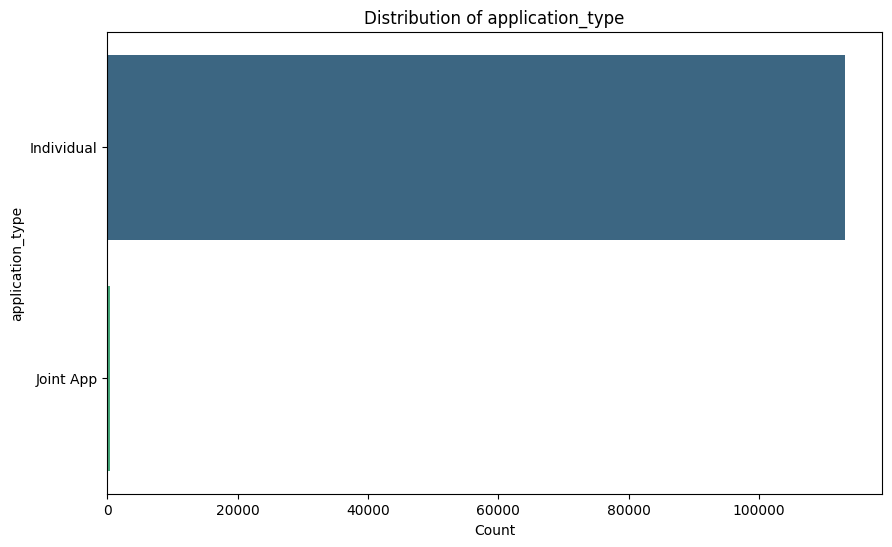

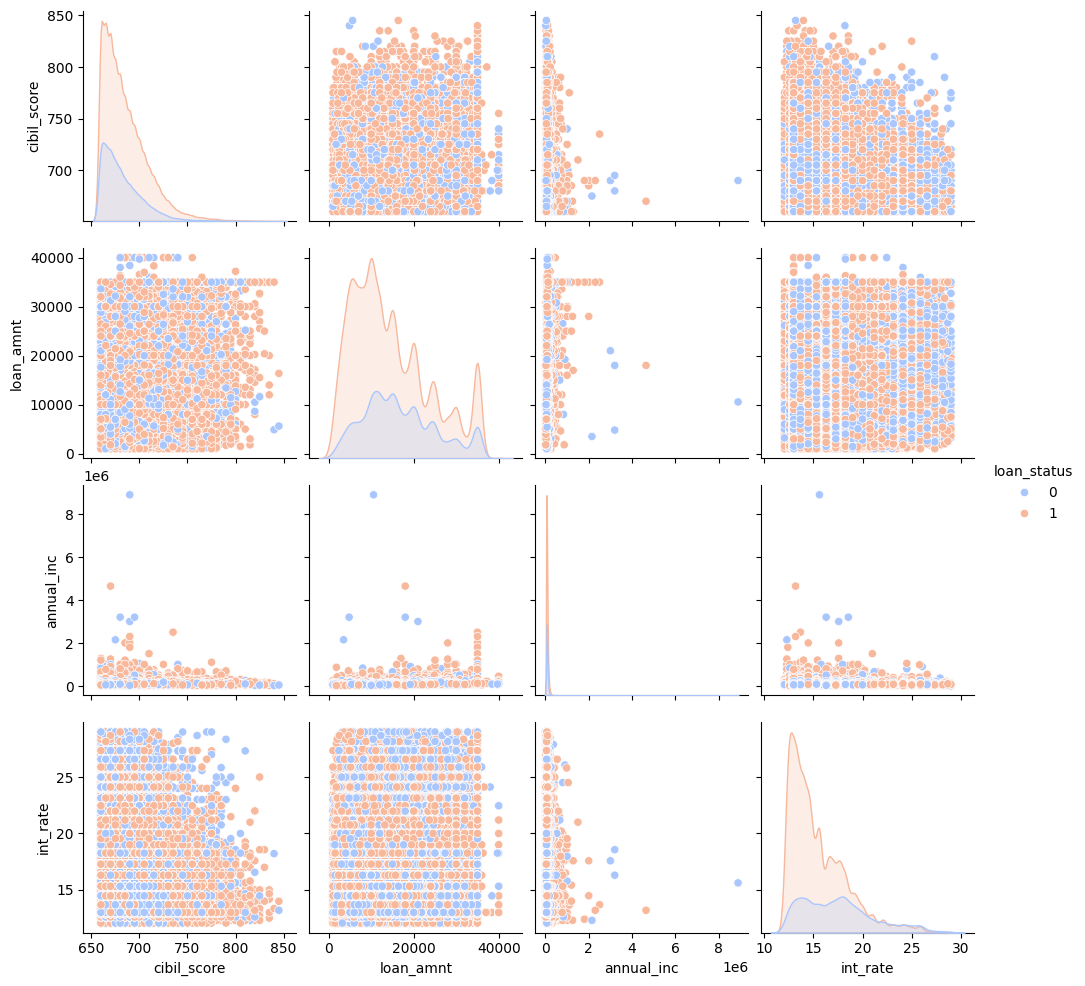

Cleaned training data saved.


In [1]:
# Exploratory Data Analysis for Loan Default Prediction

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_data_path = 'train_data.xlsx'
test_data_path = 'test_data.xlsx'

# Load the training data
train_data = pd.read_excel(train_data_path)
print("Training Data Loaded")

# Load the testing data
test_data = pd.read_excel(test_data_path)
print("Testing Data Loaded")

# Display basic information about training data
print("\nTraining Data Overview:\n")
print(train_data.info())
print("\nSummary Statistics:\n")
print(train_data.describe())

# Check for missing values
missing_values = train_data.isnull().sum()
print("\nMissing Values:\n")
print(missing_values[missing_values > 0])

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=train_data, palette='coolwarm')
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (0: Non-Default, 1: Default)")
plt.ylabel("Count")
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
# Include only numerical features for correlation analysis
corr_matrix = train_data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# Distribution of Numeric Features
numeric_features = ['cibil_score', 'annual_inc', 'loan_amnt', 'int_rate', 'emp_length']
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[feature], kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Categorical Features Analysis
categorical_features = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=train_data, palette='viridis', order=train_data[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Count")
    plt.ylabel(feature)
    plt.show()

# Pairplot to explore relationships among key features
selected_features = ['cibil_score', 'loan_amnt', 'annual_inc', 'int_rate', 'loan_status']
sns.pairplot(train_data[selected_features], hue='loan_status', palette='coolwarm')
plt.show()

# Save cleaned training data for modeling
train_data.to_csv('cleaned_train_data.csv', index=False)
print("Cleaned training data saved.")